# <a id='toc1_'></a>[Unsupervised Machine Learning: Clustering](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [Unsupervised Machine Learning: Clustering](#toc1_)    
  - [I. Data Import](#toc1_1_)    
  - [II. Data Overview](#toc1_2_)    
  - [III. Data Standardization](#toc1_3_)    
  - [III. Clustering](#toc1_4_)    
    - [III.1. Clustering](#toc1_4_1_)    
      - [III.1.1. Elbow technique](#toc1_4_1_1_)    
      - [III.1.2. K-means clustering](#toc1_4_1_2_)    
      - [III.1.3. Aggregrations](#toc1_4_1_3_)    
    - [III.2. Performance improvement: Clustering without extreme values](#toc1_4_2_)    
      - [III.2.1. Elbow technique](#toc1_4_2_1_)    
      - [III.2.2. K-means clustering](#toc1_4_2_2_)    
      - [III.2.3. Aggregrations](#toc1_4_2_3_)    
  - [IV. Reflection](#toc1_5_)    
    - [IV.1. Reflection on k-means clustering result](#toc1_5_1_)    
    - [IV.2. Reflection on k-means clustering result without extreme values](#toc1_5_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[I. Data Import](#toc0_)

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# current working directory
cwd = os.getcwd()

# get the parent directory path
repo_dir = os.path.dirname(cwd)

In [3]:
# read dataset 'salary-explored.pkl'
df = pd.read_pickle(os.path.join(repo_dir, 'data', 'prepared-data', 'salary-explored.pkl'))

## <a id='toc1_2_'></a>[II. Data Overview](#toc0_)

In [4]:
# make sure pandas display all columns
pd.set_option('display.max_columns', None)

# change the display format to non-scientific notation
pd.options.display.float_format = '{:.2f}'.format

In [5]:
# check outputs of the df
df.head(3)

,id,survey_year,timestamp,salary_in_usd,country,primary_db,years_of_exp_with_primary_db,other_dbs,employment_status,job_title,manage_staff,years_of_exp_with_data_jobs,number_of_companies_worked_for,number_of_team_members,number_of_company_employees,number_of_db_servers,education,education_is_computer_related,certifications,hours_worked_per_week,wfh_days_per_week,pop_of_largest_city_within_20_miles,employment_sector,looking_for_another_job,career_plans_this_year,other_job_duties,tasks_perfomed,month,salary_category
0,0,2017,2017-01-05 05:10:20,200000.00,United States,Microsoft SQL Server,10,MySQL/MariaDB,Full time employee,DBA,No,5,Not Asked,2,Not Asked,350,Masters,No,"Yes, and they're currently valid",45,1,Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,1,150K-200K
1,1,2017,2017-01-05 05:26:23,61515.00,United Kingdom,Microsoft SQL Server,15,"Oracle, PostgreSQL",Full time employee,DBA,No,3,Not Asked,1,Not Asked,40,None (no degree completed),Not Provided,"No, I never have",35,2,Not Asked,Private business,No,Not Asked,Not Asked,Not Asked,1,50K-100K
2,2,2017,2017-01-05 05:32:57,95000.00,Germany,Microsoft SQL Server,5,"Oracle, MySQL/MariaDB, Informix",Full time employee,Other,Yes,25,Not Asked,2,Not Asked,100,Masters,Yes,"Yes, but they expired",45,"None, or less than 1 day per week",Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,1,50K-100K


In [6]:
# check number of rows and columns
df.shape

(6860, 29)

In [7]:
# check columns
df.columns

Index(['id', 'survey_year', 'timestamp', 'salary_in_usd', 'country',
       'primary_db', 'years_of_exp_with_primary_db', 'other_dbs',
       'employment_status', 'job_title', 'manage_staff',
       'years_of_exp_with_data_jobs', 'number_of_companies_worked_for',
       'number_of_team_members', 'number_of_company_employees',
       'number_of_db_servers', 'education', 'education_is_computer_related',
       'certifications', 'hours_worked_per_week', 'wfh_days_per_week',
       'pop_of_largest_city_within_20_miles', 'employment_sector',
       'looking_for_another_job', 'career_plans_this_year', 'other_job_duties',
       'tasks_perfomed', 'month', 'salary_category'],
      dtype='object')

In [68]:
# create a subset of df with only numerical columns
sub_num = df[['salary_in_usd', 'years_of_exp_with_primary_db', 'years_of_exp_with_data_jobs', 'hours_worked_per_week']]

## <a id='toc1_3_'></a>[III. Data Standardization](#toc0_)

In [69]:
# standazing the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(sub_num)
print(standardized_data)

[[ 2.128913   -0.13204459 -0.34256611  0.28990135]
 [-0.61331376  0.69203283 -0.65844804 -1.25425832]
 [ 0.04974335 -0.95612201  2.81625309  0.28990135]
 ...
 [-1.03934552 -0.13204459  1.86860733 -0.48217849]
 [ 0.7427999   1.51611025  1.55272541 -0.17334655]
 [-0.15817362  1.35129476  1.86860733 -0.48217849]]


In [70]:
# coverting to dataframe
sub = pd.DataFrame(standardized_data, columns=sub_num.columns)
print(sub)

      salary_in_usd  years_of_exp_with_primary_db  \
0              2.13                         -0.13   
1             -0.61                          0.69   
2              0.05                         -0.96   
3             -0.72                         -0.79   
4             -1.14                         -0.13   
...             ...                           ...   
6855          -1.20                         -1.29   
6856          -1.20                         -1.29   
6857          -1.04                         -0.13   
6858           0.74                          1.52   
6859          -0.16                          1.35   

      years_of_exp_with_data_jobs  hours_worked_per_week  
0                           -0.34                   0.29  
1                           -0.66                  -1.25  
2                            2.82                   0.29  
3                           -0.82                  -0.48  
4                            0.45                  -0.48  
...      

## <a id='toc1_4_'></a>[III. Clustering](#toc0_)

### <a id='toc1_4_1_'></a>[III.1. Clustering](#toc0_)

#### <a id='toc1_4_1_1_'></a>[III.1.1. Elbow technique](#toc0_)

In [71]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters = i, n_init = 10) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [72]:
# creates a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))]

In [73]:
score

[-27439.999999999967,
 -19869.439676976668,
 -16653.164358673625,
 -14406.69099185289,
 -12234.459722688287,
 -11228.030532877036,
 -10277.656149575687,
 -9619.528907362732,
 -9019.834599549578]

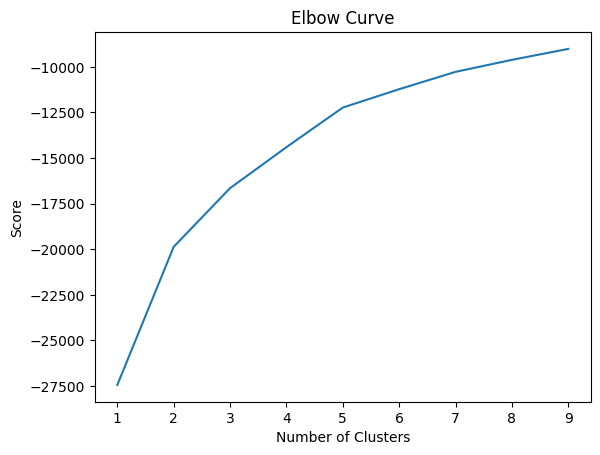

In [74]:
# Plot the elbow curve using PyLab
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [75]:
# create the k-means object
kmeans = KMeans(n_clusters = 5) 

In [76]:
# fit the k-means object to the data
kmeans.fit(sub)

C:\Users\Ansgar.S\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [77]:
sub['clusters'] = kmeans.fit_predict(sub)

C:\Users\Ansgar.S\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [78]:
sub.head(3)

,salary_in_usd,years_of_exp_with_primary_db,years_of_exp_with_data_jobs,hours_worked_per_week,clusters
0,2.13,-0.13,-0.34,0.29,1
1,-0.61,0.69,-0.66,-1.25,1
2,0.05,-0.96,2.82,0.29,0


In [79]:
sub['clusters'].value_counts()

2    2870
1    1958
0    1059
3     954
4      19
Name: clusters, dtype: int64

#### <a id='toc1_4_1_2_'></a>[III.1.2. K-means clustering](#toc0_)

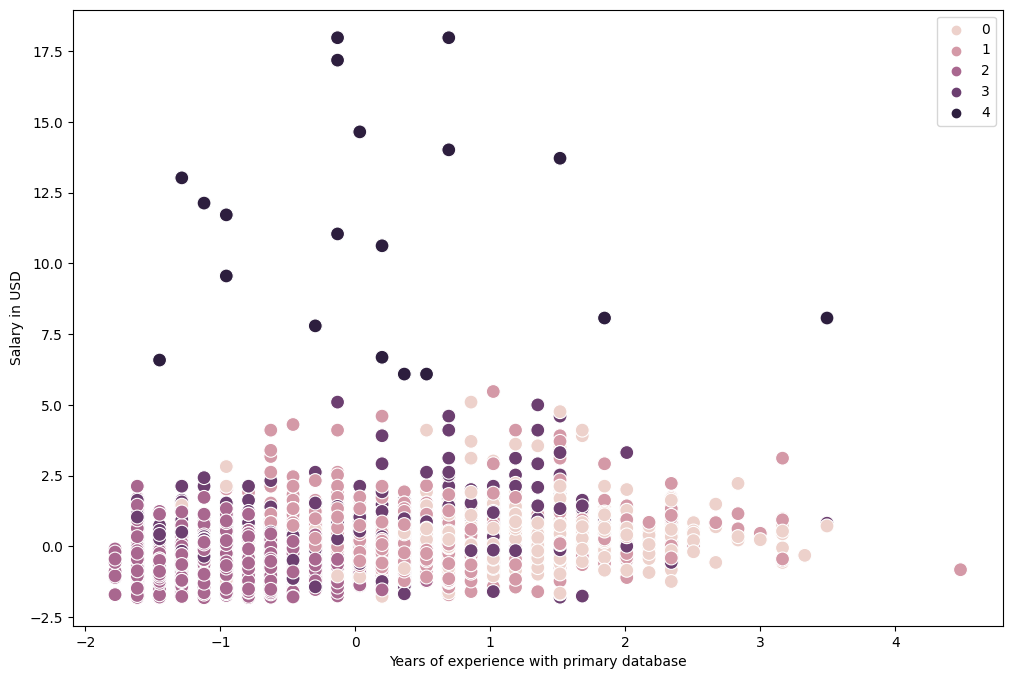

In [80]:
# plot the clusters for the 'years_of_exp_with_primary_db' and ''salary_in_usd' variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['years_of_exp_with_primary_db'], y=sub['salary_in_usd'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Years of experience with primary database') # Label x-axis.
plt.ylabel('Salary in USD') # Label y-axis.
plt.show()

**Observation:**

The clusters are overlapping each other, indicating that there is not enough separation in the variables being used to cluster the data. In this case, the scatterplot shows that there is not a clear separation between *Years of experience with primary database* and *Salary in USD*.

The small number of data points in cluster dark purple at the top of the scatterplot suggest that these individuals have high salaries but may not necessarily have a lot of experience with primary databases. Overall, the clustering result indicates that there is not a clear pattern in the data when looking at years of experience with primary database and salary in USD.

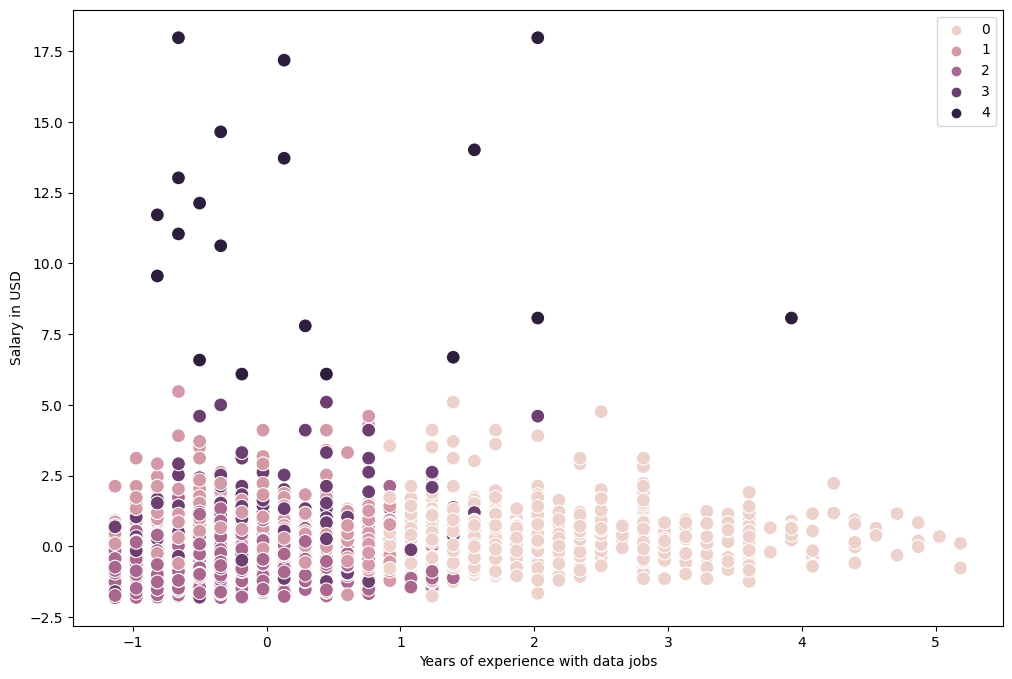

In [84]:
# plot the clusters for the 'years_of_exp_with_data_jobs' and ''salary_in_usd' variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['years_of_exp_with_data_jobs'], y=sub['salary_in_usd'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Years of experience with data jobs') # Label x-axis.
plt.ylabel('Salary in USD') # Label y-axis.
plt.show()

**Observation:**

Here the scatterplot also shows the clusters overlapping with each other.

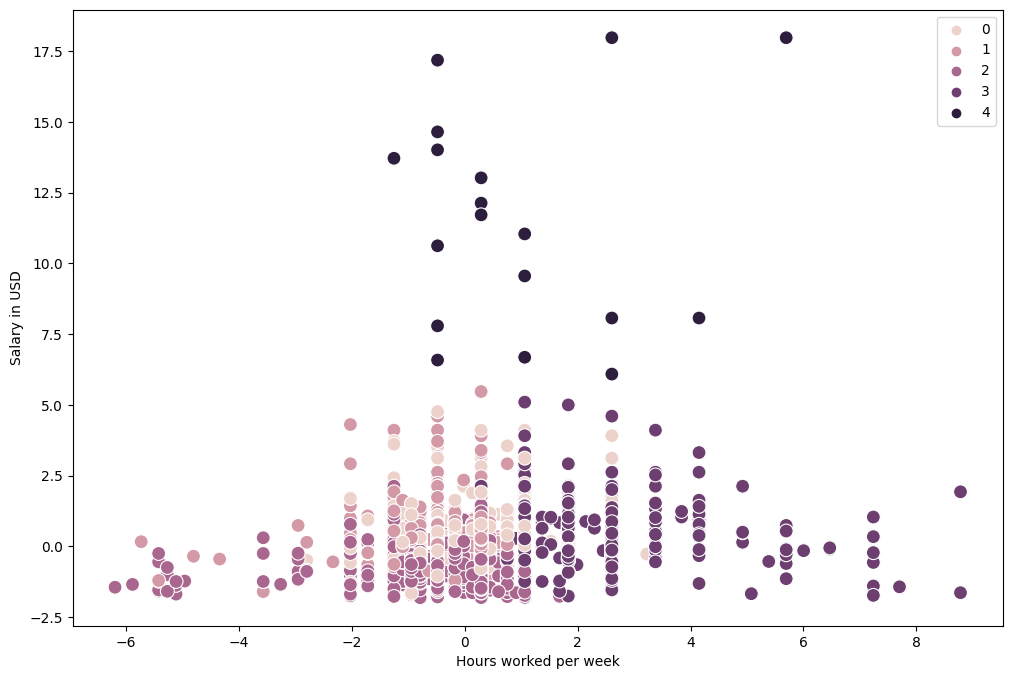

In [81]:
# plot the clusters for the 'hours_worked_per_week' and 'salary_in_usd' variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['hours_worked_per_week'], y=sub['salary_in_usd'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Hours worked per week') 
plt.ylabel('Salary in USD') 
plt.show()

#### <a id='toc1_4_1_3_'></a>[III.1.3. Aggregrations](#toc0_)

In [102]:
sub.loc[sub['clusters'] == 4, 'cluster'] = 'dark purple'
sub.loc[sub['clusters'] == 3, 'cluster'] = 'purple'
sub.loc[sub['clusters'] == 2, 'cluster'] = 'light purple'
sub.loc[sub['clusters'] == 1, 'cluster'] = 'pink'
sub.loc[sub['clusters'] == 0, 'cluster'] = 'light pink'

In [103]:
sub.groupby('cluster').agg({'salary_in_usd':['mean', 'median'], 
                         'years_of_exp_with_primary_db':['mean', 'median'], 
                         'hours_worked_per_week':['mean', 'median']})

salary_in_usd        years_of_exp_with_primary_db         \
                      mean median                         mean median   
cluster                                                                 
dark purple          11.21  11.04                         0.16   0.03   
light pink            0.30   0.27                         0.95   1.02   
light purple         -0.50  -0.50                        -0.86  -0.96   
pink                  0.29   0.25                         0.64   0.69   
purple                0.36   0.31                         0.21   0.20   

             hours_worked_per_week         
                              mean median  
cluster                                    
dark purple                   1.06   0.29  
light pink                   -0.00  -0.17  
light purple                 -0.34  -0.48  
pink                         -0.33  -0.48  
purple                        1.67   1.06

### <a id='toc1_4_2_'></a>[III.2. Performance improvement: Clustering without extreme values](#toc0_)

In [85]:
# remove extreme values
# from erlier excersices, outliers in column salary_in_usd are values higher than 250000
# extreme values in column hours_worked_per_week are values higher than 60 or lower than 30
sub_wo_outliers = sub_num[(sub_num['salary_in_usd'] < 250000) & (sub_num['hours_worked_per_week'] >= 30) & (sub_num['hours_worked_per_week'] <= 60)]

In [86]:
# standazing the data
scaler = StandardScaler()
standardized_data_2 = scaler.fit_transform(sub_wo_outliers)
print(standardized_data_2)

[[ 3.03083367 -0.12771501 -0.33993704  0.4020617 ]
 [-0.77900146  0.69914831 -0.65577476 -1.52329205]
 [ 0.14219816 -0.95457833  2.81844023  0.4020617 ]
 ...
 [-1.37089663 -0.12771501  1.87092705 -0.56061517]
 [ 1.10507666  1.52601164  1.55508933 -0.17554442]
 [-0.14666539  1.36063897  1.87092705 -0.56061517]]


In [87]:
# coverting to dataframe
sub_test = pd.DataFrame(standardized_data_2, columns=sub_wo_outliers.columns)
print(sub_test)

      salary_in_usd  years_of_exp_with_primary_db  \
0              3.03                         -0.13   
1             -0.78                          0.70   
2              0.14                         -0.95   
3             -0.93                         -0.79   
4             -1.51                         -0.13   
...             ...                           ...   
6692          -1.59                         -1.29   
6693          -1.59                         -1.29   
6694          -1.37                         -0.13   
6695           1.11                          1.53   
6696          -0.15                          1.36   

      years_of_exp_with_data_jobs  hours_worked_per_week  
0                           -0.34                   0.40  
1                           -0.66                  -1.52  
2                            2.82                   0.40  
3                           -0.81                  -0.56  
4                            0.45                  -0.56  
...      

#### <a id='toc1_4_2_1_'></a>[III.2.1. Elbow technique](#toc0_)

In [88]:
num_cl_2 = range(1, 10) # Defines the range of potential clusters in the data.
kmeans_2 = [KMeans(n_clusters = i, n_init = 10) for i in num_cl_2] # Defines k-means clusters in the range assigned above.

In [89]:
# creates a score that represents a rate of variation for the given cluster option
score_2 = [kmeans_2[i].fit(sub_test).score(sub_test) for i in range(len(kmeans_2))]

In [90]:
score_2

[-26787.999999999996,
 -18723.19569162068,
 -15318.64481223489,
 -12804.989005921492,
 -11631.639593531609,
 -10616.087978198624,
 -9729.979771992124,
 -9192.798678976174,
 -8747.538093483421]

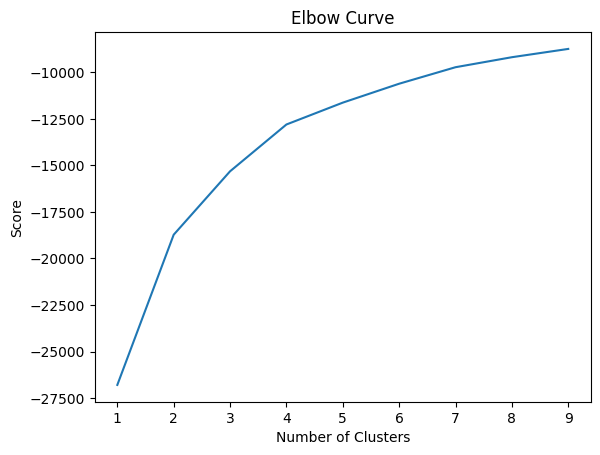

In [91]:
# Plot the elbow curve using PyLab
pl.plot(num_cl_2,score_2)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [92]:
# create the k-means object
kmeans_2 = KMeans(n_clusters = 4) 

In [93]:
# fit the k-means object to the data
kmeans_2.fit(sub_test)

C:\Users\Ansgar.S\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [94]:
sub_test['clusters'] = kmeans_2.fit_predict(sub_test)

C:\Users\Ansgar.S\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [95]:
sub_test.head(3)

,salary_in_usd,years_of_exp_with_primary_db,years_of_exp_with_data_jobs,hours_worked_per_week,clusters
0,3.03,-0.13,-0.34,0.40,0
1,-0.78,0.70,-0.66,-1.52,0
2,0.14,-0.95,2.82,0.40,3


In [96]:
sub_test['clusters'].value_counts()

1    2617
0    2061
3    1046
2     973
Name: clusters, dtype: int64

#### <a id='toc1_4_2_2_'></a>[III.2.2. K-means clustering](#toc0_)

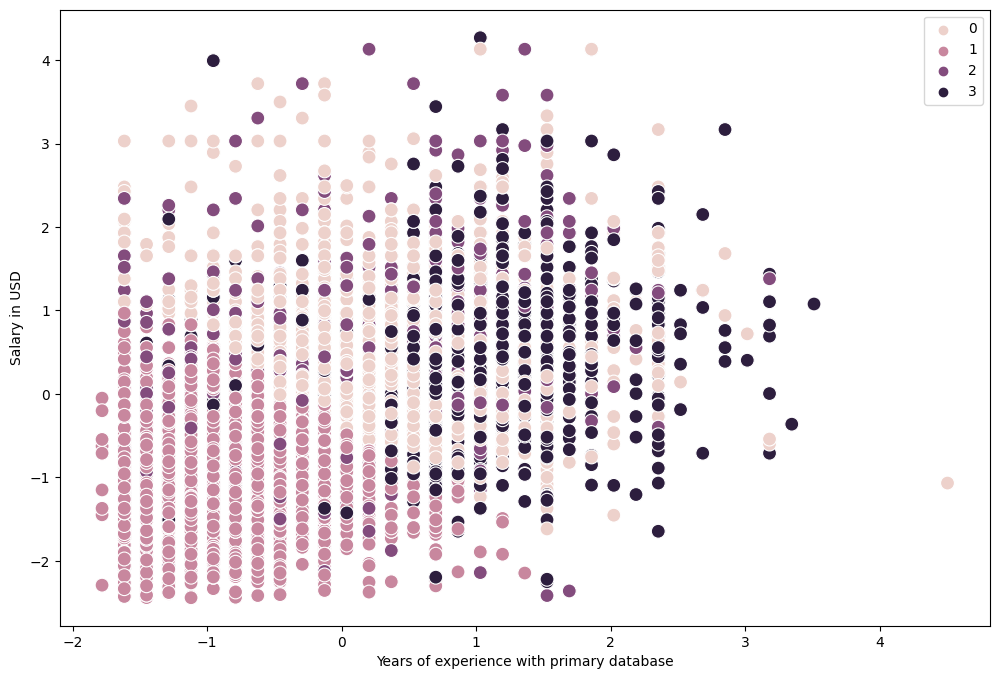

In [97]:
# plot the clusters for the 'years_of_exp_with_primary_db' and ''salary_in_usd' variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub_test['years_of_exp_with_primary_db'], y=sub_test['salary_in_usd'], hue=kmeans_2.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Years of experience with primary database') # Label x-axis.
plt.ylabel('Salary in USD') # Label y-axis.
plt.show()

**Observation:**

It seems that the removal of salaries above 250,000 has resulted in a narrower range of salary values, which may have caused the clusters to overlap more closely. The fact that all three clusters are stacked on top of each other suggests that there is not much differentiation in terms of salary and hours worked per week among the data points. It is also interesting to note that cluster "2" now has more data points than before, which could suggest that the removal of high salaries has affected the distribution of data points in this cluster. Overall, the updated scatterplot suggests that the removal of high salaries has had an impact on the clustering results, but more analysis would be needed to fully understand the implications.

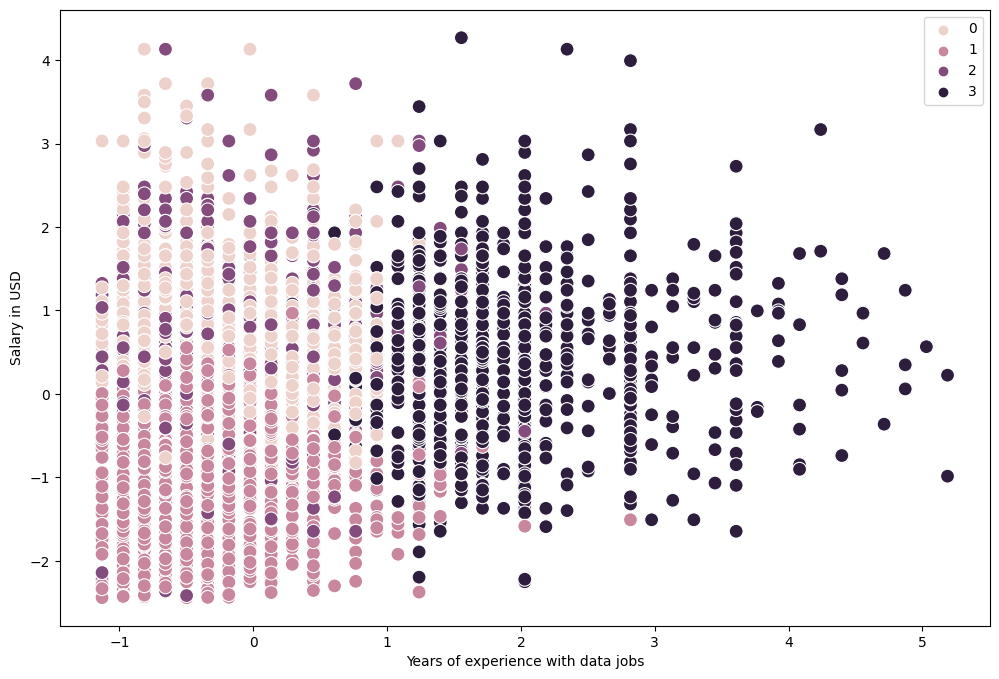

In [98]:
# plot the clusters for the 'years_of_exp_with_data_jobs' and 'salary_in_usd' variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub_test['years_of_exp_with_data_jobs'], y=sub_test['salary_in_usd'], hue=kmeans_2.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Years of experience with data jobs') # Label x-axis.
plt.ylabel('Salary in USD') # Label y-axis.
plt.show()

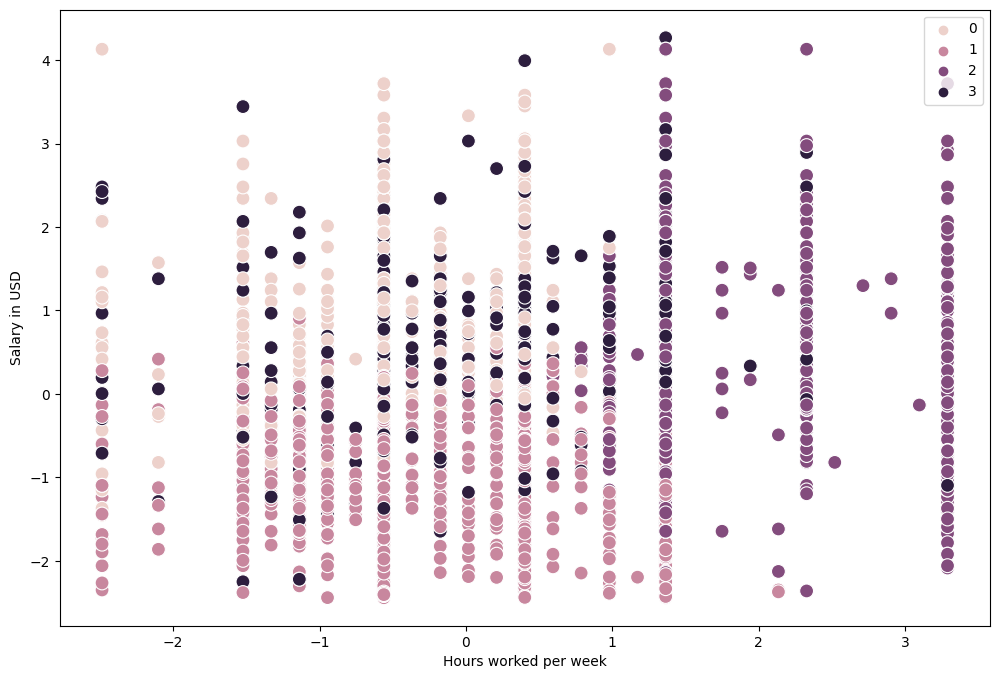

In [99]:
# plot the clusters for the 'hours_worked_per_week' and 'salary_in_usd' variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub_test['hours_worked_per_week'], y=sub_test['salary_in_usd'], hue=kmeans_2.labels_, s=100)

ax.grid(False) 
plt.xlabel('Hours worked per week') 
plt.ylabel('Salary in USD') 
plt.show()

#### <a id='toc1_4_2_3_'></a>[III.2.3. Aggregrations](#toc0_)

In [100]:
sub_test.loc[sub_test['clusters'] == 3, 'cluster'] = 'dark purple'
sub_test.loc[sub_test['clusters'] == 2, 'cluster'] = 'purple'
sub_test.loc[sub_test['clusters'] == 1, 'cluster'] = 'light purple'
sub_test.loc[sub_test['clusters'] == 0, 'cluster'] = 'pink'

In [101]:
sub_test.groupby('cluster').agg({'salary_in_usd':['mean', 'median'], 
                         'years_of_exp_with_primary_db':['mean', 'median'], 
                         'hours_worked_per_week':['mean', 'median']})

salary_in_usd        years_of_exp_with_primary_db         \
                      mean median                         mean median   
cluster                                                                 
dark purple           0.45   0.42                         0.98   1.03   
light purple         -0.79  -0.74                        -0.82  -0.95   
pink                  0.56   0.53                         0.46   0.37   
purple                0.45   0.42                         0.17   0.04   

             hours_worked_per_week         
                              mean median  
cluster                                    
dark purple                  -0.01  -0.37  
light purple                 -0.39  -0.56  
pink                         -0.34  -0.56  
purple                        1.78   1.36

## <a id='toc1_5_'></a>[IV. Reflection](#toc0_)

### <a id='toc1_5_1_'></a>[IV.1. Reflection on k-means clustering result](#toc0_)

**Based on the means and medians of the variables, we can make some observations about the clusters:**

- The dark purple cluster has the highest mean and median salaries, the second lowest mean and median years of experience with primary database and the second highest mean and median hours worked per week. This suggests that this cluster may contain *high earners* who *do not necessarily have many years of experience with the primary database*, and *work relatively long hours*.

Similarly, we can conclude that:

- Light pink cluster represents data professionals who have *moderate salaries*, have *the most experience with primary databases* & *work shorter hours*.

- Light purple clusters represents people who have the *lowest salaries*, have *the least experience with primary database* & *work the least hours*.

- Pink cluster represents people who have *moderate salaries*, have *moderate experience with primary database* & also *work short hours*.

- Purple cluster represents people who have *higher salaries*, have *relatively low experience with primary database* & *works the longest hours*.

### <a id='toc1_5_2_'></a>[IV.2. Reflection on k-means clustering result without extreme values](#toc0_)

Comparing the two k means clustering results before and after excluding outliers, we can see that some clusters have changed significantly while others remained relatively similar.

For example, the dark purple cluster had a significant change in salary_in_usd, with a decrease in both mean and median after excluding outliers. Additionally, years_of_exp_with_primary_db increased in both mean and median, and hours_worked_per_week decreased in mean and median.

On the other hand, the purple cluster remained relatively similar in terms of salary_in_usd, with only a slight decrease in both mean and median. Years_of_exp_with_primary_db increased slightly in both mean and median, and hours_worked_per_week increased significantly in both mean and median.